This code uses Sklearn to create regression models that analyze sentiment trends and predict sentiment scores

Libraries used:
1. Pandas
2. Sklearn

In [91]:
#importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split


In [92]:
#reading Dataset
df = pd.read_csv('result/task1_result.csv')
#Removing Unwanted Columns
columns_to_drop = ['Subject', 'body', 'from','sentiment']  # Convert tuple to list
# Dropping the columns
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,date,processed_text,sentiment_score
0,5/10/2010,enronoptions announcement updated enronoptions...,1
1,7/29/2010,"marc , unfortunately , today going work revenu...",1
2,7/25/2011,": wednesday , june 06 , 2001 10:00 am-11:00 ( ...",0
3,3/25/2010,thinking papasitos ( meet somewhere closer tim...,0
4,5/21/2011,"since never gave $ 20 last time bet cu/texas ,...",1


In [93]:
# Getting message frequency in a month, message length, average message length, word count from the data and adding it to a new csv file
df['message_frequency'] = df.groupby('date')['date'].transform('count')
df['message_length'] = df['processed_text'].str.len()
df['average_message_length'] = df['message_length'] / df['message_frequency']
df['word_count'] = df['processed_text'].str.split().str.len()
# Saving the modified DataFrame to a new CSV file
df.to_csv('result/task6_pretrain.csv', index=False)



In [94]:
df.head()

,date,processed_text,sentiment_score,message_frequency,message_length,average_message_length,word_count
0,5/10/2010,enronoptions announcement updated enronoptions...,1,4,571.0,142.750000,83.0
1,7/29/2010,"marc , unfortunately , today going work revenu...",1,5,230.0,46.000000,45.0
2,7/25/2011,": wednesday , june 06 , 2001 10:00 am-11:00 ( ...",0,2,158.0,79.000000,47.0
3,3/25/2010,thinking papasitos ( meet somewhere closer tim...,0,3,113.0,37.666667,19.0
4,5/21/2011,"since never gave $ 20 last time bet cu/texas ,...",1,6,137.0,22.833333,27.0


Starting the training part
Phase 1 Test Train Split

In [95]:
df = pd.read_csv('result/task6_pretrain.csv')
#removing Null values
df.dropna(inplace=True)
#removing unwanted coloums ie. 'processed_text' and 'date'
columns_to_drop = ['date', 'message_length','word_count']
# Dropping the columns
df.drop(columns=columns_to_drop, inplace=True)


In [96]:
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/maulikdave/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maulikdave/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
#Adding negative word count to the data using NLTK library

from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Load negative word list from NLTK
negative_words = set(opinion_lexicon.negative())
positive_words = set(opinion_lexicon.positive())

# Function to count negative words in a sentence
def count_negative_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in negative_words)
def count_positive_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in positive_words)
# Apply to DataFrame
df['negative_word_count'] = df['processed_text'].apply(count_negative_words)
df['positive_word_count'] = df['processed_text'].apply(count_positive_words)



In [98]:
#Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['message_frequency', 'average_message_length','negative_word_count','positive_word_count']] = scaler.fit_transform(df[['message_frequency', 'average_message_length','negative_word_count','positive_word_count']])
df.drop(columns='processed_text', inplace=True)




In [99]:
# Splitting the data into training and testing sets Target variable is 'sentiment'
X = df.drop('sentiment_score', axis=1)  # Features
y = df['sentiment_score']  # Target variable
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Phase 2:
EDA

Correlation Matrix:
                        sentiment_score  message_frequency  \
sentiment_score                1.000000           0.003913   
message_frequency              0.003913           1.000000   
average_message_length         0.157351          -0.421100   
negative_word_count           -0.084244           0.018426   
positive_word_count            0.281596          -0.011543   

                        average_message_length  negative_word_count  \
sentiment_score                       0.157351            -0.084244   
message_frequency                    -0.421100             0.018426   
average_message_length                1.000000             0.270720   
negative_word_count                   0.270720             1.000000   
positive_word_count                   0.442161             0.267503   

                        positive_word_count  
sentiment_score                    0.281596  
message_frequency                 -0.011543  
average_message_length             0.44216

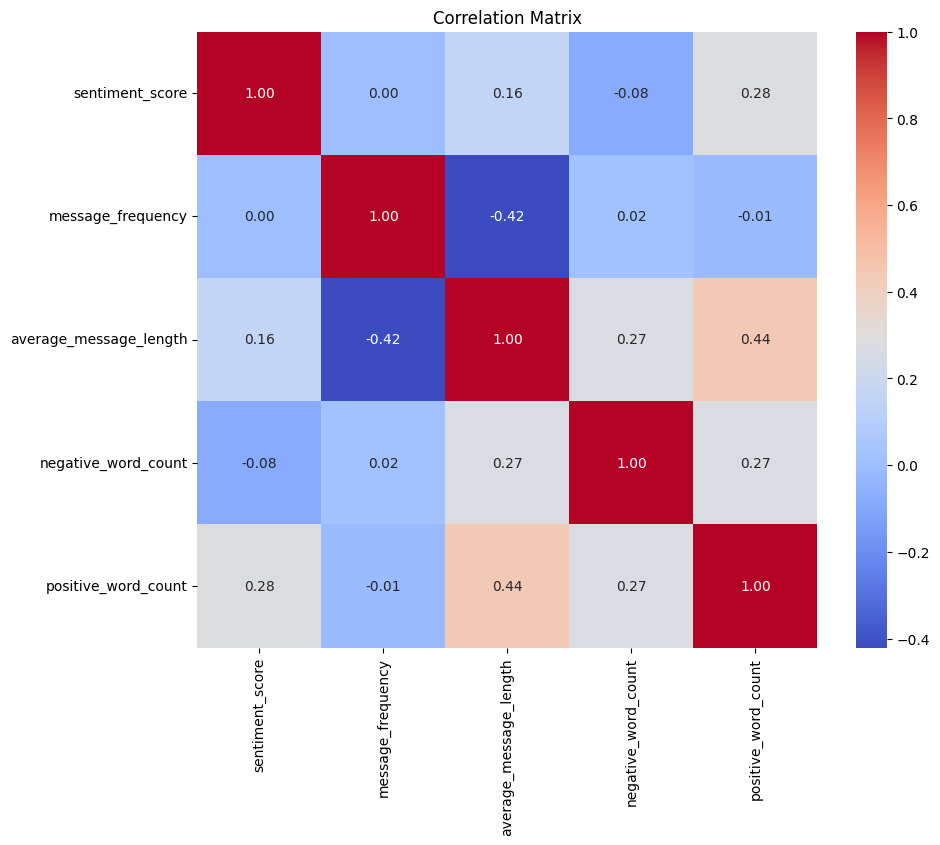

In [100]:
#finding relationship between the features and target variable
correlation_matrix = df.corr()
# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
#importing matplotlib for plotting the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Phase 3:
Importing Libraries for the Regression model

In [101]:
#Importing sklearn libraries for the linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
# Starting the training, fiiting the model
model = LinearRegression()
model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.2979914351349921
R-squared: 0.12483356941777823


In [103]:
#using polynomial linear regression
from sklearn.preprocessing import PolynomialFeatures
# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
# Making predictions on the test set with polynomial features
X_test_poly = poly.transform(X_test)
y_poly_pred = poly_model.predict(X_test_poly)
# Evaluating the polynomial regression model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print(f'Polynomial Mean Squared Error: {mse_poly}')
print(f'Polynomial R-squared: {r2_poly}')



Polynomial Mean Squared Error: 0.287853491879413
Polynomial R-squared: 0.15460753794949467
